In [45]:
#pip install pyarrow

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [47]:
df = pd.read_excel('testIR01.xlsx')

In [48]:
df

,survey_number,medical_profile,Secondary_Spec,Has_Secondary_Spec,Country,incentive_offered,incentives_currency_type,LOI,firstParticipation,lastParticipation,InhouseComplete,InhouseTQ,Incidence Rate %,timeline_days,Incentive_in_USD
0,P2100840101,Oncohematology,"Hematology,Oncology,Oncohematology",Yes,USA,60,USD,30,2021-09-14 06:26:47,2021-09-30 14:17:35,47,12,79.661017,16,60.0
1,P2100840102,Internal Medicine,Internal Medicine,No,USA,60,USD,30,2021-09-20 13:20:44,2021-10-12 19:53:55,7,9,43.750000,22,60.0
2,P2101130101,Dermatology,Dermatology,No,USA,55,USD,25,2021-04-12 12:22:02,2021-04-22 15:18:43,36,8,81.818182,10,55.0
3,P2101130102,Pharmacist,"Medical Director,Pharmacy Director",Yes,USA,50,USD,25,2021-04-13 16:06:29,2021-04-19 21:12:56,2,2,50.000000,6,50.0
4,P2101130103,Pharmacist,"Pharmacist,Community Pharmacist,Hospital Pharm...",Yes,USA,50,USD,25,2021-04-18 12:46:54,2021-04-29 22:37:24,4,6,40.000000,11,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,P2302670102,Surgeon,Plastic and reconstructive surgery,Yes,GERMANY,55,EUR,15,2023-07-26 02:17:58,2023-07-27 03:44:56,0,4,0.000000,1,60.5
2257,P2302670201,Dermatology,Dermatology,No,SPAIN,30,EUR,15,2023-07-25 14:57:49,2023-07-27 12:01:28,4,8,33.333333,1,33.0
2258,P2302670202,Surgeon,Plastic and reconstructive surgery,Yes,SPAIN,40,EUR,15,2023-07-25 15:03:22,2023-07-26 03:00:14,0,2,0.000000,0,44.0
2259,P2302670301,Dermatology,Dermatology,No,ITALY,30,EUR,15,2023-07-25 15:00:08,2023-07-29 03:36:21,1,5,16.666667,3,33.0


In [49]:
df1 = df.drop('Secondary_Spec',axis=1)

In [50]:
df1

,survey_number,medical_profile,Has_Secondary_Spec,Country,incentive_offered,incentives_currency_type,LOI,firstParticipation,lastParticipation,InhouseComplete,InhouseTQ,Incidence Rate %,timeline_days,Incentive_in_USD
0,P2100840101,Oncohematology,Yes,USA,60,USD,30,2021-09-14 06:26:47,2021-09-30 14:17:35,47,12,79.661017,16,60.0
1,P2100840102,Internal Medicine,No,USA,60,USD,30,2021-09-20 13:20:44,2021-10-12 19:53:55,7,9,43.750000,22,60.0
2,P2101130101,Dermatology,No,USA,55,USD,25,2021-04-12 12:22:02,2021-04-22 15:18:43,36,8,81.818182,10,55.0
3,P2101130102,Pharmacist,Yes,USA,50,USD,25,2021-04-13 16:06:29,2021-04-19 21:12:56,2,2,50.000000,6,50.0
4,P2101130103,Pharmacist,Yes,USA,50,USD,25,2021-04-18 12:46:54,2021-04-29 22:37:24,4,6,40.000000,11,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,P2302670102,Surgeon,Yes,GERMANY,55,EUR,15,2023-07-26 02:17:58,2023-07-27 03:44:56,0,4,0.000000,1,60.5
2257,P2302670201,Dermatology,No,SPAIN,30,EUR,15,2023-07-25 14:57:49,2023-07-27 12:01:28,4,8,33.333333,1,33.0
2258,P2302670202,Surgeon,Yes,SPAIN,40,EUR,15,2023-07-25 15:03:22,2023-07-26 03:00:14,0,2,0.000000,0,44.0
2259,P2302670301,Dermatology,No,ITALY,30,EUR,15,2023-07-25 15:00:08,2023-07-29 03:36:21,1,5,16.666667,3,33.0


In [51]:
df1.isna().sum()

survey_number               0
medical_profile             0
Has_Secondary_Spec          0
Country                     0
incentive_offered           0
incentives_currency_type    0
LOI                         0
firstParticipation          0
lastParticipation           0
InhouseComplete             0
InhouseTQ                   0
Incidence Rate %            0
timeline_days               0
Incentive_in_USD            0
dtype: int64

In [52]:
df1.duplicated().sum()

0

In [53]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
incentive_offered,2261.0,108.024326,306.066781,0.0,30.000000,50.000000,85.000000,4000.0
LOI,2261.0,23.453339,12.208193,5.0,15.000000,20.000000,30.000000,60.0
InhouseComplete,2261.0,10.567448,16.665674,0.0,2.000000,6.000000,13.000000,483.0
InhouseTQ,2261.0,12.552410,19.927468,0.0,2.000000,6.000000,15.000000,197.0
Incidence Rate %,2261.0,46.825671,30.357796,0.0,23.076923,46.666667,69.230769,100.0
timeline_days,2261.0,17.196373,19.280358,0.0,4.000000,12.000000,22.000000,237.0
Incentive_in_USD,2261.0,62.864003,45.698848,0.0,27.500000,50.000000,83.000000,448.0


In [54]:
df1.tail(10)

,survey_number,medical_profile,Has_Secondary_Spec,Country,incentive_offered,incentives_currency_type,LOI,firstParticipation,lastParticipation,InhouseComplete,InhouseTQ,Incidence Rate %,timeline_days,Incentive_in_USD
2251,P2302600101,Neurology,Yes,USA,100,USD,40,2023-07-25 10:36:36,2023-07-28 20:56:36,17,28,37.777778,3,100.0
2252,P2302600201,Neurology,Yes,UNITED KINGDOM,100,GBP,40,2023-07-27 09:50:16,2023-07-28 05:46:41,2,2,50.000000,0,128.0
2253,P2302630101,Oncology,Yes,INDIA,3500,INR,20,2023-07-19 10:52:37,2023-07-26 10:08:56,4,8,33.333333,6,42.0
2254,P2302660101,Non Healthcare Professional,Yes,USA,20,USD,10,2023-07-24 09:08:35,2023-07-28 23:44:26,12,155,7.185629,4,20.0
2255,P2302670101,Dermatology,No,GERMANY,40,EUR,15,2023-07-26 01:46:45,2023-07-28 06:51:33,1,15,6.250000,2,44.0
2256,P2302670102,Surgeon,Yes,GERMANY,55,EUR,15,2023-07-26 02:17:58,2023-07-27 03:44:56,0,4,0.000000,1,60.5
2257,P2302670201,Dermatology,No,SPAIN,30,EUR,15,2023-07-25 14:57:49,2023-07-27 12:01:28,4,8,33.333333,1,33.0
2258,P2302670202,Surgeon,Yes,SPAIN,40,EUR,15,2023-07-25 15:03:22,2023-07-26 03:00:14,0,2,0.000000,0,44.0
2259,P2302670301,Dermatology,No,ITALY,30,EUR,15,2023-07-25 15:00:08,2023-07-29 03:36:21,1,5,16.666667,3,33.0
2260,P2302670302,Surgeon,Yes,ITALY,40,EUR,15,2023-07-25 17:47:05,2023-07-25 17:47:05,0,1,0.000000,0,44.0


In [55]:
#pip install forex-python

In [56]:
#from forex_python.converter import CurrencyRates

Function to convert incentive amount to USD
def convert_to_usd(row):
    currency = row["incentives_currency_type"]
    amount = row["incentive_offered"]
    if currency == "USD":
        return amount
    else:
        c = CurrencyRates()
        usd_amount = c.convert(currency, "USD", amount)
        return usd_amount

In [57]:
# Apply the function to create a new column "Incentive_in_USD"
#df["Incentive_in_USD"] = df.apply(convert_to_usd, axis=1)

In [58]:
df.head()

,survey_number,medical_profile,Secondary_Spec,Has_Secondary_Spec,Country,incentive_offered,incentives_currency_type,LOI,firstParticipation,lastParticipation,InhouseComplete,InhouseTQ,Incidence Rate %,timeline_days,Incentive_in_USD
0,P2100840101,Oncohematology,"Hematology,Oncology,Oncohematology",Yes,USA,60,USD,30,2021-09-14 06:26:47,2021-09-30 14:17:35,47,12,79.661017,16,60.0
1,P2100840102,Internal Medicine,Internal Medicine,No,USA,60,USD,30,2021-09-20 13:20:44,2021-10-12 19:53:55,7,9,43.750000,22,60.0
2,P2101130101,Dermatology,Dermatology,No,USA,55,USD,25,2021-04-12 12:22:02,2021-04-22 15:18:43,36,8,81.818182,10,55.0
3,P2101130102,Pharmacist,"Medical Director,Pharmacy Director",Yes,USA,50,USD,25,2021-04-13 16:06:29,2021-04-19 21:12:56,2,2,50.000000,6,50.0
4,P2101130103,Pharmacist,"Pharmacist,Community Pharmacist,Hospital Pharm...",Yes,USA,50,USD,25,2021-04-18 12:46:54,2021-04-29 22:37:24,4,6,40.000000,11,50.0


In [59]:
df1 = df.copy()

In [60]:
df1.drop(['survey_number','Secondary_Spec','incentive_offered','incentives_currency_type'],axis=1,inplace=True)

In [61]:
df1.head()

,medical_profile,Has_Secondary_Spec,Country,LOI,firstParticipation,lastParticipation,InhouseComplete,InhouseTQ,Incidence Rate %,timeline_days,Incentive_in_USD
0,Oncohematology,Yes,USA,30,2021-09-14 06:26:47,2021-09-30 14:17:35,47,12,79.661017,16,60.0
1,Internal Medicine,No,USA,30,2021-09-20 13:20:44,2021-10-12 19:53:55,7,9,43.750000,22,60.0
2,Dermatology,No,USA,25,2021-04-12 12:22:02,2021-04-22 15:18:43,36,8,81.818182,10,55.0
3,Pharmacist,Yes,USA,25,2021-04-13 16:06:29,2021-04-19 21:12:56,2,2,50.000000,6,50.0
4,Pharmacist,Yes,USA,25,2021-04-18 12:46:54,2021-04-29 22:37:24,4,6,40.000000,11,50.0


In [62]:
df1.shape

(2261, 11)

In [63]:
df1.shape

(2261, 11)

In [64]:
df1 = df1.sort_values(by='firstParticipation')

In [65]:
df1.drop(['firstParticipation','lastParticipation'],axis=1,inplace=True)

In [66]:
df1.head()

,medical_profile,Has_Secondary_Spec,Country,LOI,InhouseComplete,InhouseTQ,Incidence Rate %,timeline_days,Incentive_in_USD
14,Dermatology,No,USA,20,2,15,11.764706,14,45.0
15,Oncology,No,USA,25,14,4,77.777778,13,60.0
17,Mix Specialty type,No,USA,30,0,2,0.000000,9,80.0
2,Dermatology,No,USA,25,36,8,81.818182,10,55.0
16,Dermatology,No,GERMANY,15,6,38,13.636364,38,55.0


In [67]:
df1.rename(columns={'Incidence Rate %': 'IR_Perct'}, inplace=True)

In [68]:
df1.head()

,medical_profile,Has_Secondary_Spec,Country,LOI,InhouseComplete,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD
14,Dermatology,No,USA,20,2,15,11.764706,14,45.0
15,Oncology,No,USA,25,14,4,77.777778,13,60.0
17,Mix Specialty type,No,USA,30,0,2,0.000000,9,80.0
2,Dermatology,No,USA,25,36,8,81.818182,10,55.0
16,Dermatology,No,GERMANY,15,6,38,13.636364,38,55.0


In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261 entries, 14 to 2217
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   medical_profile     2261 non-null   object 
 1   Has_Secondary_Spec  2261 non-null   object 
 2   Country             2261 non-null   object 
 3   LOI                 2261 non-null   int64  
 4   InhouseComplete     2261 non-null   int64  
 5   InhouseTQ           2261 non-null   int64  
 6   IR_Perct            2261 non-null   float64
 7   timeline_days       2261 non-null   int64  
 8   Incentive_in_USD    2261 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 176.6+ KB


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

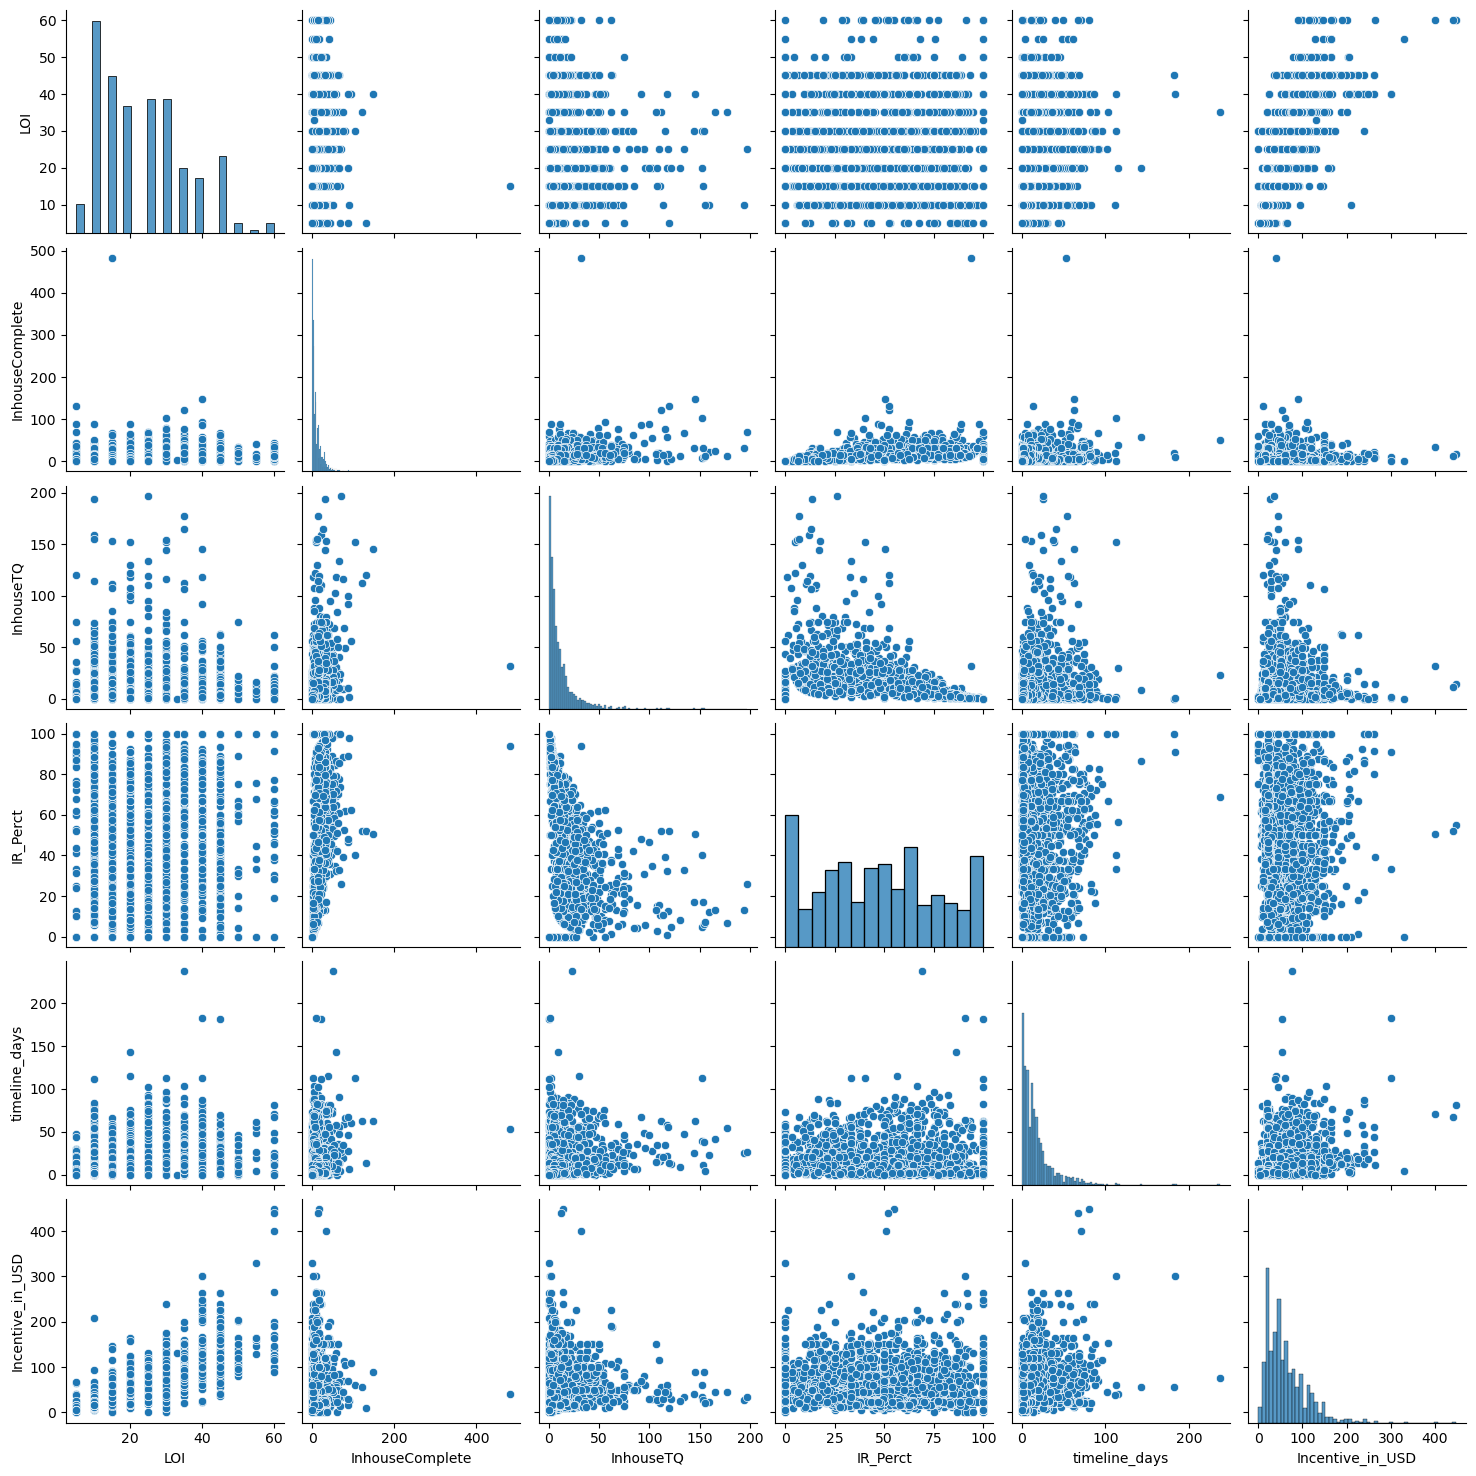

In [71]:
sns.pairplot(data=df1);

In [72]:
corr = df1.corr()

C:\Users\Ganpat\AppData\Local\Temp\ipykernel_22936\1630763350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


corr

In [73]:
corr

,LOI,InhouseComplete,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD
LOI,1.000000,0.020592,0.039497,-0.044248,0.176191,0.776935
InhouseComplete,0.020592,1.000000,0.360026,0.292899,0.193455,-0.027587
InhouseTQ,0.039497,0.360026,1.000000,-0.287719,0.163372,-0.041829
IR_Perct,-0.044248,0.292899,-0.287719,1.000000,0.061944,0.009027
timeline_days,0.176191,0.193455,0.163372,0.061944,1.000000,0.238776
Incentive_in_USD,0.776935,-0.027587,-0.041829,0.009027,0.238776,1.000000


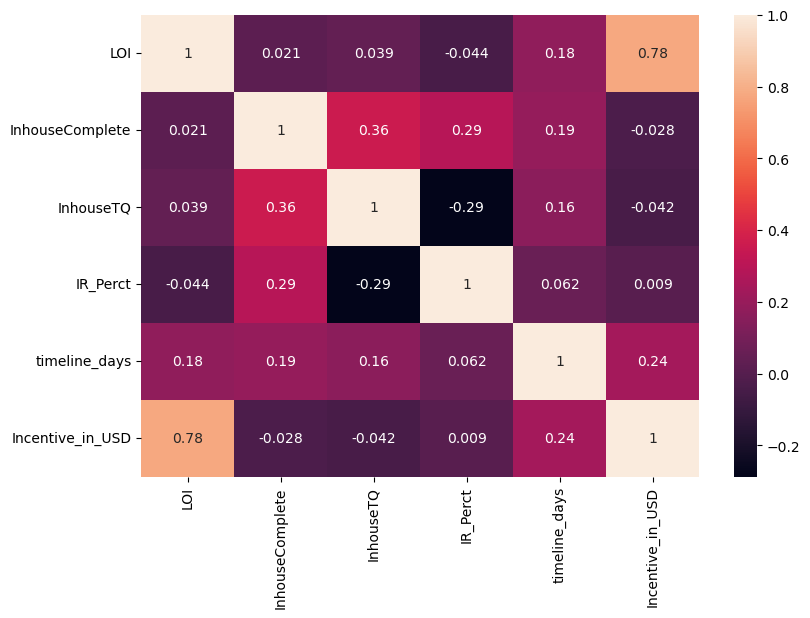

In [74]:
sns.heatmap(corr, annot = True);

In [75]:
df1.columns

Index(['medical_profile', 'Has_Secondary_Spec', 'Country', 'LOI',
       'InhouseComplete', 'InhouseTQ', 'IR_Perct', 'timeline_days',
       'Incentive_in_USD'],
      dtype='object')

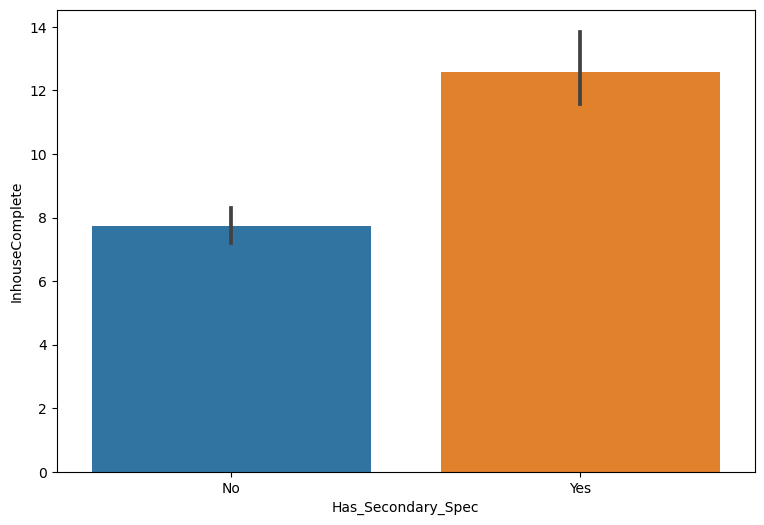

In [76]:
sns.barplot(data= df1, y='InhouseComplete',x='Has_Secondary_Spec');

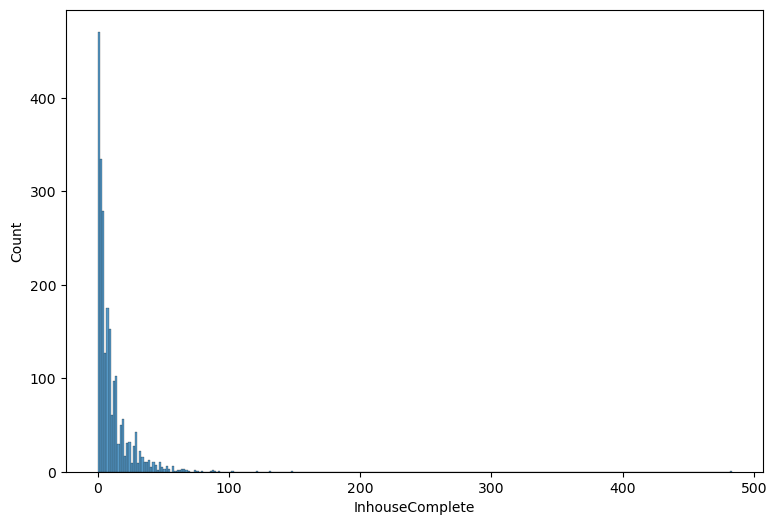

In [77]:
sns.histplot(data=df1, x='InhouseComplete');

In [78]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,6

In [79]:
df1.columns

Index(['medical_profile', 'Has_Secondary_Spec', 'Country', 'LOI',
       'InhouseComplete', 'InhouseTQ', 'IR_Perct', 'timeline_days',
       'Incentive_in_USD'],
      dtype='object')

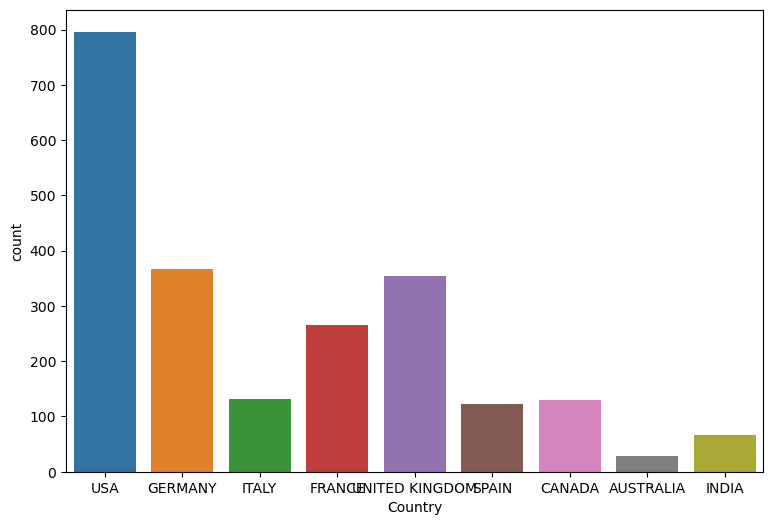

In [80]:
sns.countplot(data=df1,x='Country');

In [81]:
df1.head(1)

,medical_profile,Has_Secondary_Spec,Country,LOI,InhouseComplete,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD
14,Dermatology,No,USA,20,2,15,11.764706,14,45.0


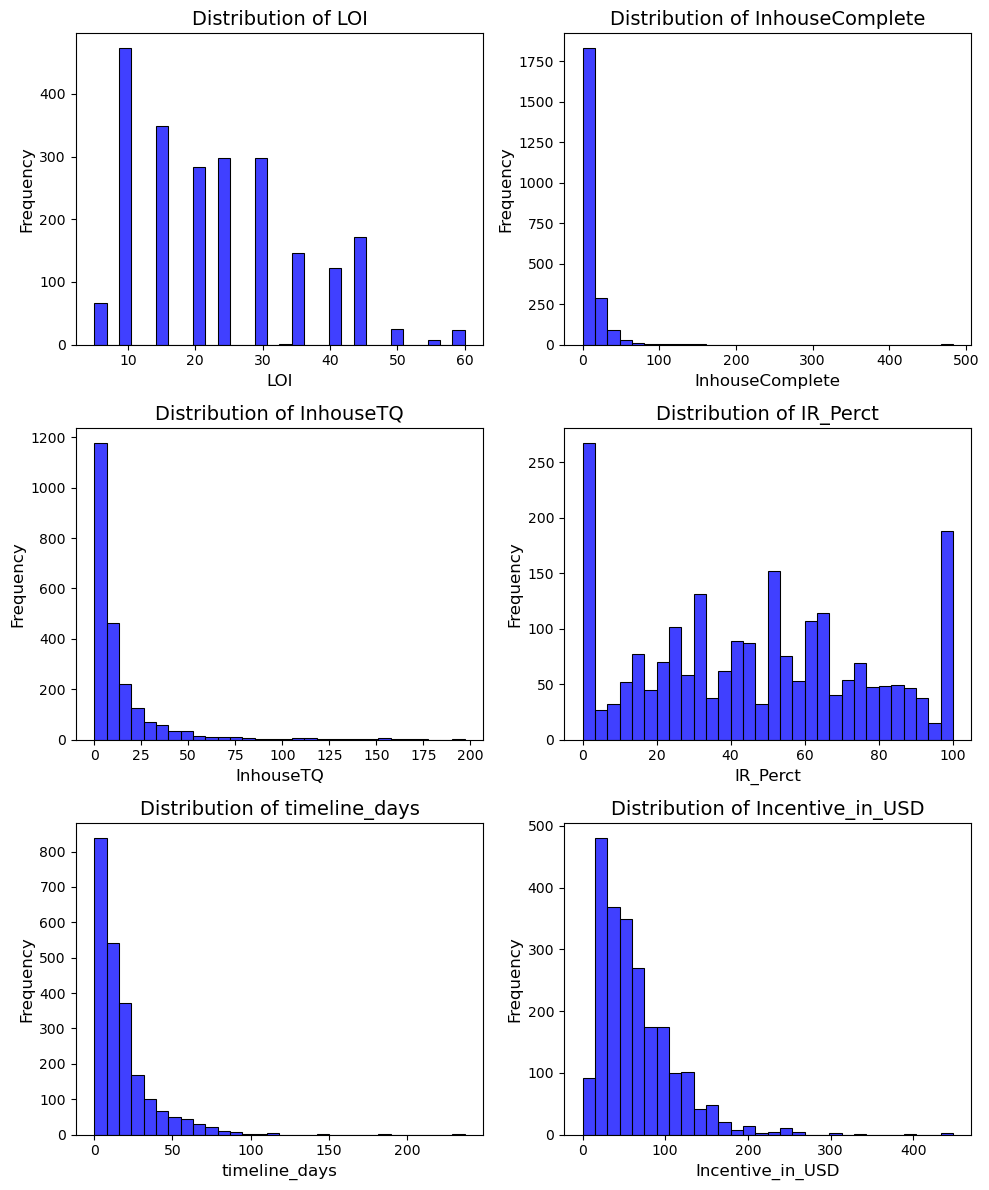

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the continuous features
features = ['LOI', 'InhouseComplete', 'InhouseTQ', 'IR_Perct', 'timeline_days', 'Incentive_in_USD']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Iterate over the features and plot their distributions
for i, feature in enumerate(features):
    row = i // 2  # Calculate the row index
    col = i % 2  # Calculate the column index
    
    # Plot the distribution of the feature
    sns.histplot(data=df1, x=feature, kde=False, bins=30, color='blue', ax=axes[row, col])
    
    # Set the labels and title for the subplot
    axes[row, col].set_xlabel(feature, fontsize=12)
    axes[row, col].set_ylabel('Frequency', fontsize=12)
    axes[row, col].set_title('Distribution of ' + feature, fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

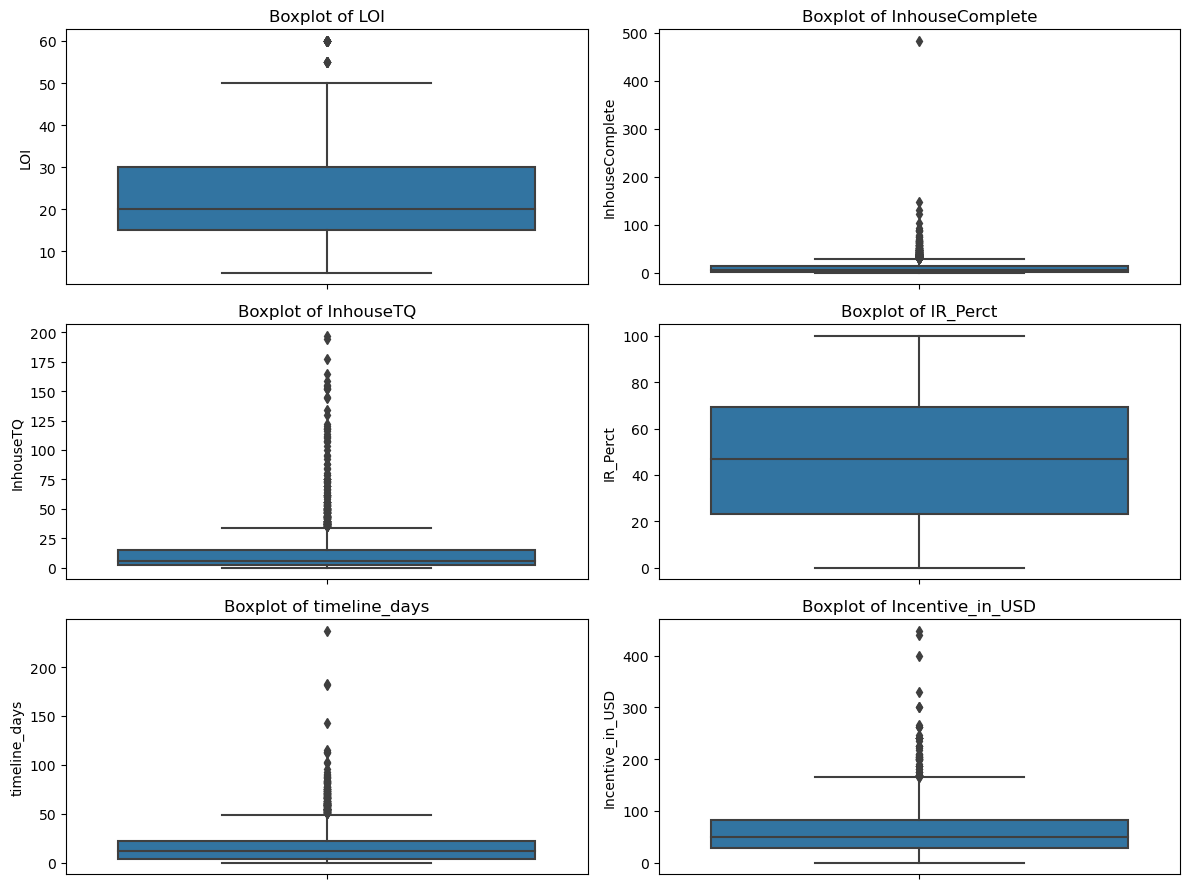

In [83]:
# Univariate Analysis
plt.figure(figsize=(12, 9))

# Define the continuous features
features = ['LOI', 'InhouseComplete', 'InhouseTQ', 'IR_Perct', 'timeline_days', 'Incentive_in_USD']

for i in range(len(features)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df1[features[i]], data=df1)
    plt.title('Boxplot of {}'.format(features[i]))
    plt.tight_layout()

In [84]:
df1.head(1)

,medical_profile,Has_Secondary_Spec,Country,LOI,InhouseComplete,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD
14,Dermatology,No,USA,20,2,15,11.764706,14,45.0


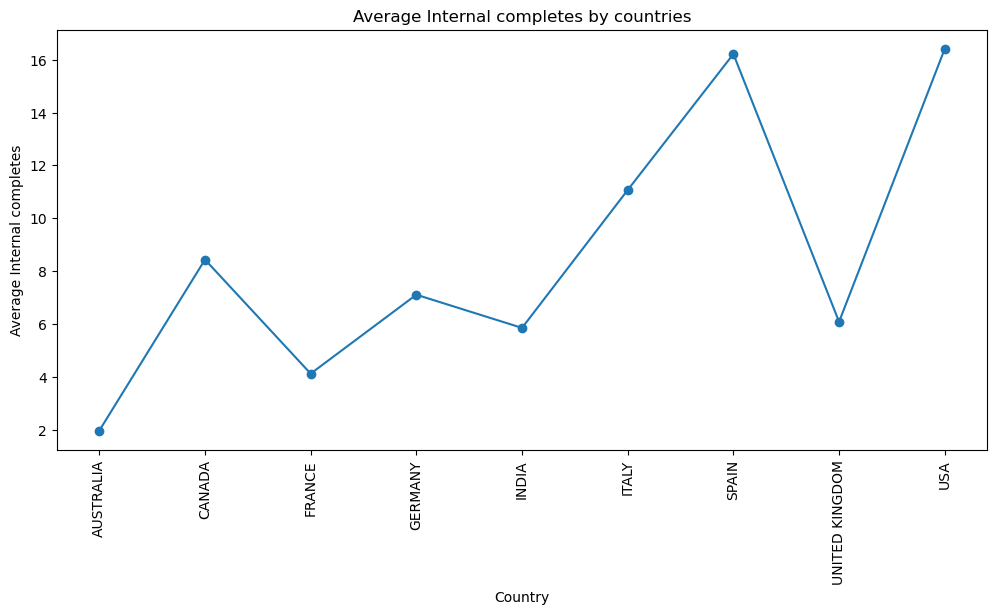

In [85]:
import matplotlib.pyplot as plt

# Plotting the average insurance cost
plt.figure(figsize=(12, 6))
ax = df1.groupby('Country')['InhouseComplete'].mean().plot(marker='o')

# Customizing the plot
plt.ylabel('Average Internal completes')
plt.xticks(rotation=90)
plt.title('Average Internal completes by countries')

# Adjusting subplot parameters
plt.subplots_adjust(bottom=0.2, top=0.9)  # Adjust bottom and top spacing as per your preference

# Rotating x-axis labels further
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()

In [86]:
df1.groupby('medical_profile')['InhouseComplete'].mean().round(2).sort_values()

medical_profile
Hepatology                                   0.00
Radiation Oncology                           0.33
Interventional Cardiology                    0.80
Physician Assistant                          1.00
Radiology                                    1.73
Cardiovascular Disease                       2.00
Reproductive Endocrinology - Infertility     2.00
Sleep Medicine                               2.33
MD - Orthopaedics                            2.50
Non Healthcare Professional                  2.56
Optometry (Not MD)                           2.60
Nursing                                      3.49
Critical Care Medicine                       3.62
Electrophysiology                            3.67
Geriatric Medicine                           3.67
Infectious Disease Specialists               3.75
Urology                                      3.78
Infectious Disease                           3.80
Pathology                                    4.27
Surgeon                           

In [87]:
df1[df1['medical_profile'] == 'Patients']

,medical_profile,Has_Secondary_Spec,Country,LOI,InhouseComplete,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD
193,Patients,No,USA,30,60,0,100.0,0,0.0


In [88]:
df1 = df1[df1['medical_profile'] != 'Patients']

In [89]:
df1.groupby(['medical_profile','Country'])['InhouseComplete'].mean().round(2).sort_values()

medical_profile                 Country  
Infectious Disease Specialists  FRANCE        0.00
Interventional Cardiology       GERMANY       0.00
Nursing                         AUSTRALIA     0.00
Gastroenterology                INDIA         0.00
Pathology                       INDIA         0.00
                                             ...  
General Practice                CANADA       26.60
Oncology                        SPAIN        27.85
General Practice                SPAIN        28.38
Dentistry                       USA          40.83
General Practice                USA          44.95
Name: InhouseComplete, Length: 297, dtype: float64

In [90]:
df1.skew()

C:\Users\Ganpat\AppData\Local\Temp\ipykernel_22936\149261804.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.skew()


LOI                  0.627659
InhouseComplete     11.725141
InhouseTQ            4.098646
IR_Perct             0.102654
timeline_days        2.812670
Incentive_in_USD     1.965823
dtype: float64

In [91]:
df1.head()

,medical_profile,Has_Secondary_Spec,Country,LOI,InhouseComplete,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD
14,Dermatology,No,USA,20,2,15,11.764706,14,45.0
15,Oncology,No,USA,25,14,4,77.777778,13,60.0
17,Mix Specialty type,No,USA,30,0,2,0.000000,9,80.0
2,Dermatology,No,USA,25,36,8,81.818182,10,55.0
16,Dermatology,No,GERMANY,15,6,38,13.636364,38,55.0


In [92]:
#Let's check the number of outliers per column

In [93]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[5,95])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [94]:
outlier_cols=['InhouseComplete', 'InhouseTQ','timeline_days']

In [95]:
for column in outlier_cols:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

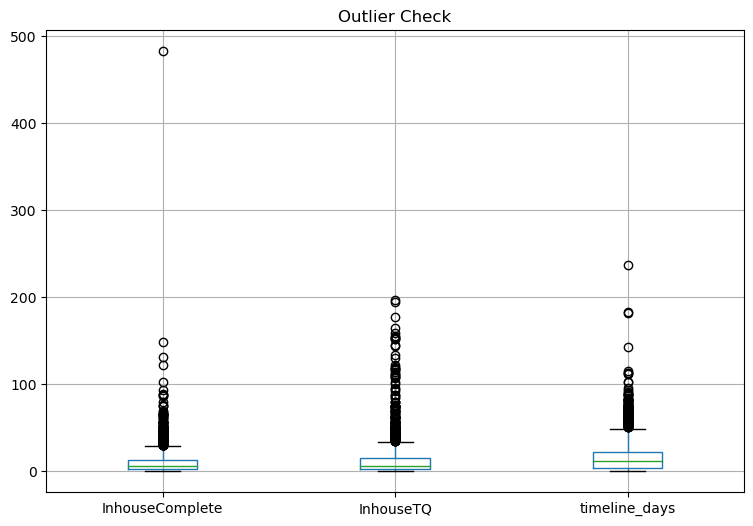

In [96]:
df[outlier_cols].boxplot(vert=1)
plt.title("Outlier Check")
plt.show()

In [97]:
df1.columns

Index(['medical_profile', 'Has_Secondary_Spec', 'Country', 'LOI',
       'InhouseComplete', 'InhouseTQ', 'IR_Perct', 'timeline_days',
       'Incentive_in_USD'],
      dtype='object')

In [98]:
df_dummy = pd.get_dummies(df1,drop_first=True,columns=['Has_Secondary_Spec','Country'])
df_dummy.head()

,medical_profile,LOI,InhouseComplete,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD,Has_Secondary_Spec_Yes,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA
14,Dermatology,20,2.0,15.0,11.764706,14.0,45.0,0,0,0,0,0,0,0,0,1
15,Oncology,25,14.0,4.0,77.777778,13.0,60.0,0,0,0,0,0,0,0,0,1
17,Mix Specialty type,30,0.0,2.0,0.000000,9.0,80.0,0,0,0,0,0,0,0,0,1
2,Dermatology,25,36.0,8.0,81.818182,10.0,55.0,0,0,0,0,0,0,0,0,1
16,Dermatology,15,6.0,38.0,13.636364,38.0,55.0,0,0,0,1,0,0,0,0,0


In [99]:
df_dummy.columns

Index(['medical_profile', 'LOI', 'InhouseComplete', 'InhouseTQ', 'IR_Perct',
       'timeline_days', 'Incentive_in_USD', 'Has_Secondary_Spec_Yes',
       'Country_CANADA', 'Country_FRANCE', 'Country_GERMANY', 'Country_INDIA',
       'Country_ITALY', 'Country_SPAIN', 'Country_UNITED KINGDOM',
       'Country_USA'],
      dtype='object')

In [100]:
df_dummy.head()

,medical_profile,LOI,InhouseComplete,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD,Has_Secondary_Spec_Yes,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA
14,Dermatology,20,2.0,15.0,11.764706,14.0,45.0,0,0,0,0,0,0,0,0,1
15,Oncology,25,14.0,4.0,77.777778,13.0,60.0,0,0,0,0,0,0,0,0,1
17,Mix Specialty type,30,0.0,2.0,0.000000,9.0,80.0,0,0,0,0,0,0,0,0,1
2,Dermatology,25,36.0,8.0,81.818182,10.0,55.0,0,0,0,0,0,0,0,0,1
16,Dermatology,15,6.0,38.0,13.636364,38.0,55.0,0,0,0,1,0,0,0,0,0


### Variable Transformation - Dependent variable

In [101]:
df_dummy['InhouseComplete'].skew()

2.573569036794363

In [102]:
df_dummy.skew()

C:\Users\Ganpat\AppData\Local\Temp\ipykernel_22936\2337179923.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dummy.skew()


LOI                       0.627659
InhouseComplete           2.573569
InhouseTQ                 3.212657
IR_Perct                  0.102654
timeline_days             2.205726
Incentive_in_USD          1.965823
Has_Secondary_Spec_Yes   -0.350622
Country_CANADA            3.820902
Country_FRANCE            2.374263
Country_GERMANY           1.832038
Country_INDIA             5.550025
Country_ITALY             3.768566
Country_SPAIN             3.949982
Country_UNITED KINGDOM    1.890676
Country_USA               0.621242
dtype: float64

C:\Users\Ganpat\AppData\Local\Temp\ipykernel_22936\1804816448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df_dummy['InhouseComplete']))


<Axes: xlabel='InhouseComplete', ylabel='Density'>

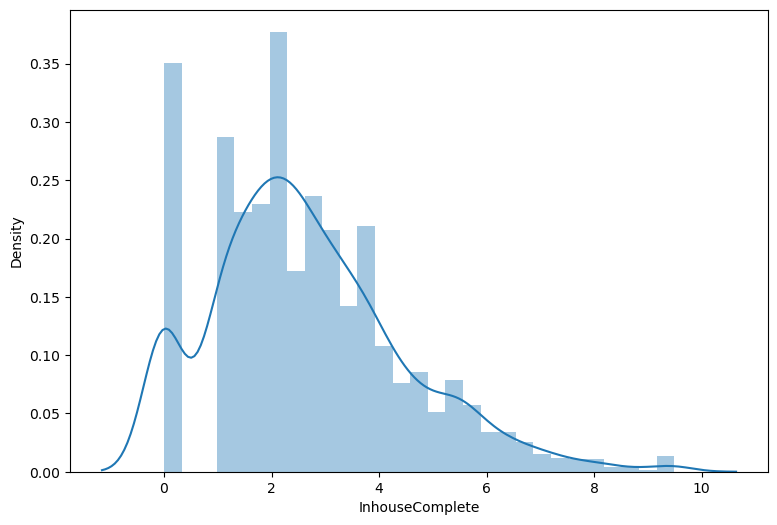

In [103]:
sns.distplot(np.sqrt(df_dummy['InhouseComplete']))

In [104]:
from scipy import stats

In [105]:
transformed_data, lambda_value = stats.yeojohnson(df_dummy['InhouseComplete'])

C:\Users\Ganpat\AppData\Local\Temp\ipykernel_22936\3011555267.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(transformed_data))


<Axes: ylabel='Density'>

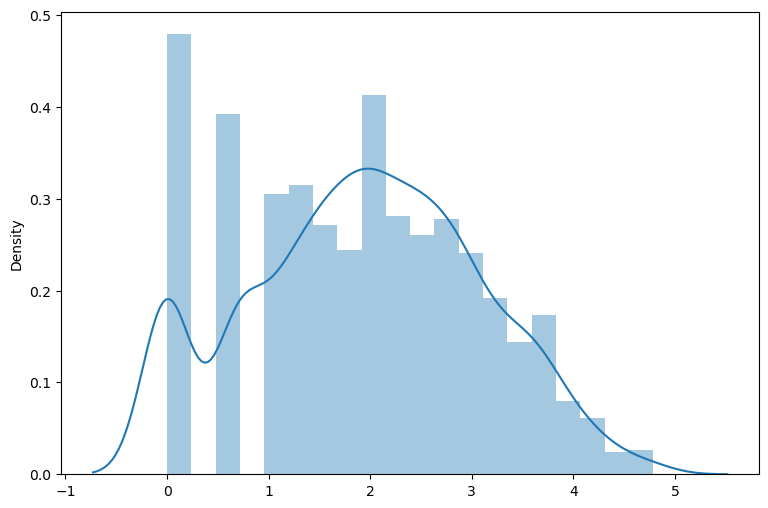

In [106]:
sns.distplot(pd.DataFrame(transformed_data))

In [107]:
pd.DataFrame(transformed_data)

,0
0,1.114406
1,2.805369
2,0.000000
3,3.785321
4,1.995826
...,...
2255,0.000000
2256,0.699412
2257,0.000000
2258,1.114406


In [108]:
df_dummy['InhouseComplete_yeojohnson'] = transformed_data

In [109]:
df_dummy.head()

,medical_profile,LOI,InhouseComplete,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD,Has_Secondary_Spec_Yes,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA,InhouseComplete_yeojohnson
14,Dermatology,20,2.0,15.0,11.764706,14.0,45.0,0,0,0,0,0,0,0,0,1,1.114406
15,Oncology,25,14.0,4.0,77.777778,13.0,60.0,0,0,0,0,0,0,0,0,1,2.805369
17,Mix Specialty type,30,0.0,2.0,0.000000,9.0,80.0,0,0,0,0,0,0,0,0,1,0.000000
2,Dermatology,25,36.0,8.0,81.818182,10.0,55.0,0,0,0,0,0,0,0,0,1,3.785321
16,Dermatology,15,6.0,38.0,13.636364,38.0,55.0,0,0,0,1,0,0,0,0,0,1.995826


In [110]:
df_dummy.drop('InhouseComplete',axis=1,inplace=True)

In [111]:
df_dummy['InhouseComplete_yeojohnson'] = df_dummy['InhouseComplete_yeojohnson'].replace('InhouseComplete_yeojohnson','InhouseComplete')

In [112]:
df_dummy.head()

,medical_profile,LOI,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD,Has_Secondary_Spec_Yes,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA,InhouseComplete_yeojohnson
14,Dermatology,20,15.0,11.764706,14.0,45.0,0,0,0,0,0,0,0,0,1,1.114406
15,Oncology,25,4.0,77.777778,13.0,60.0,0,0,0,0,0,0,0,0,1,2.805369
17,Mix Specialty type,30,2.0,0.000000,9.0,80.0,0,0,0,0,0,0,0,0,1,0.000000
2,Dermatology,25,8.0,81.818182,10.0,55.0,0,0,0,0,0,0,0,0,1,3.785321
16,Dermatology,15,38.0,13.636364,38.0,55.0,0,0,0,1,0,0,0,0,0,1.995826


In [113]:
df_dummy.rename(columns={'InhouseComplete_yeojohnson': 'InhouseComplete'}, inplace=True)

In [114]:
df_dummy.head()

,medical_profile,LOI,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD,Has_Secondary_Spec_Yes,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA,InhouseComplete
14,Dermatology,20,15.0,11.764706,14.0,45.0,0,0,0,0,0,0,0,0,1,1.114406
15,Oncology,25,4.0,77.777778,13.0,60.0,0,0,0,0,0,0,0,0,1,2.805369
17,Mix Specialty type,30,2.0,0.000000,9.0,80.0,0,0,0,0,0,0,0,0,1,0.000000
2,Dermatology,25,8.0,81.818182,10.0,55.0,0,0,0,0,0,0,0,0,1,3.785321
16,Dermatology,15,38.0,13.636364,38.0,55.0,0,0,0,1,0,0,0,0,0,1.995826


In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [116]:
train_df, test_df = train_test_split(df_dummy, test_size=0.3, random_state=42)

In [117]:
target_means = train_df.groupby('medical_profile')['InhouseComplete'].mean().to_dict()

In [118]:
train_df['medical_profile_encoded'] = train_df['medical_profile'].map(target_means)
test_df['medical_profile_encoded'] = test_df['medical_profile'].map(target_means)

In [119]:
test_df[test_df['medical_profile_encoded'] ==np.NaN]

,medical_profile,LOI,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD,Has_Secondary_Spec_Yes,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA,InhouseComplete,medical_profile_encoded


In [120]:
test_df.dropna(inplace=True)

In [121]:
X_train = train_df.drop(['medical_profile', 'InhouseComplete'], axis=1)
y_train = train_df['InhouseComplete']

X_test = test_df.drop(['medical_profile', 'InhouseComplete'], axis=1)
y_test = test_df['InhouseComplete']

In [122]:
X_train.head()

,LOI,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD,Has_Secondary_Spec_Yes,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA,medical_profile_encoded
2184,10,19.0,32.142857,1.0,14.3,1,0,0,0,0,0,1,0,0,2.501999
351,25,47.0,42.682927,21.0,50.0,1,0,0,0,0,0,0,0,1,2.334704
122,20,14.0,61.111111,21.0,55.0,1,0,0,1,0,0,0,0,0,2.501999
2148,10,4.0,66.666667,2.0,22.0,1,0,0,0,0,1,0,0,0,2.219869
2035,30,10.0,52.380952,9.0,33.0,1,0,0,0,1,0,0,0,0,1.854281


In [123]:
X_train.head()

,LOI,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD,Has_Secondary_Spec_Yes,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA,medical_profile_encoded
2184,10,19.0,32.142857,1.0,14.3,1,0,0,0,0,0,1,0,0,2.501999
351,25,47.0,42.682927,21.0,50.0,1,0,0,0,0,0,0,0,1,2.334704
122,20,14.0,61.111111,21.0,55.0,1,0,0,1,0,0,0,0,0,2.501999
2148,10,4.0,66.666667,2.0,22.0,1,0,0,0,0,1,0,0,0,2.219869
2035,30,10.0,52.380952,9.0,33.0,1,0,0,0,1,0,0,0,0,1.854281


In [124]:
X_train_Num = X_train.iloc[:,:5]

In [125]:
X_train_Num

,LOI,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD
2184,10,19.0,32.142857,1.0,14.3
351,25,47.0,42.682927,21.0,50.0
122,20,14.0,61.111111,21.0,55.0
2148,10,4.0,66.666667,2.0,22.0
2035,30,10.0,52.380952,9.0,33.0
...,...,...,...,...,...
1700,25,25.0,26.470588,9.0,24.0
997,40,2.0,88.235294,15.0,204.8
1170,15,16.0,42.857143,14.0,25.0
1317,10,2.0,33.333333,0.0,28.6


In [126]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_Num.values, i) for i in range(X_train_Num.shape[1])],
    index=X_train_Num.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

LOI                 9.564428
InhouseTQ           1.485641
IR_Perct            2.336710
timeline_days       1.999591
Incentive_in_USD    7.649257
dtype: float64



In [127]:
X_train_Num.drop('LOI',axis=1,inplace=True)

In [128]:
X_train_Num

,InhouseTQ,IR_Perct,timeline_days,Incentive_in_USD
2184,19.0,32.142857,1.0,14.3
351,47.0,42.682927,21.0,50.0
122,14.0,61.111111,21.0,55.0
2148,4.0,66.666667,2.0,22.0
2035,10.0,52.380952,9.0,33.0
...,...,...,...,...
1700,25.0,26.470588,9.0,24.0
997,2.0,88.235294,15.0,204.8
1170,16.0,42.857143,14.0,25.0
1317,2.0,33.333333,0.0,28.6


In [129]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_Num.values, i) for i in range(X_train_Num.shape[1])],
    index=X_train_Num.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

InhouseTQ           1.333007
IR_Perct            2.035039
timeline_days       1.997963
Incentive_in_USD    2.337973
dtype: float64



In [130]:
X_train.drop('LOI',axis=1,inplace=True)

In [131]:
X_test.drop('LOI',axis=1,inplace=True)

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Linear Regression using statsmodels(OLS)

In [133]:
X_train_lr=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test_lr=sm.add_constant(X_test)

In [134]:
model = sm.OLS(y_train,X_train_lr).fit()
model

In [135]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        InhouseComplete   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     272.1
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:45:57   Log-Likelihood:                -1444.0
No. Observations:                1582   AIC:                             2918.
Df Residuals:                    1567   BIC:                             2999.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.0538      0.150     -7.012      0.000      -1.349      -0.759
InhouseTQ                   0.0255      0.001     25.294      0.000       0.024       0.028
IR_Perct                    0.0224      0.001     39.500      0.000       0.021       0.023
timeline_days               0.0068      0.001      8.003      0.000       0.005       0.008
Incentive_in_USD           -0.0013      0.000     -3.558      0.000      -0.002      -0.001
Has_Secondary_Spec_Yes      0.1305      0.032      4.062      0.000       0.067       0.194
Country_CANADA              0.4108      0.149      2.753      0.006       0.118       0.704
Country_FRANCE              0.0998      0.144      0.694      0.488      -0.182       0.382
Country_GERMANY             0.4384      0.142      3.087      0.002       0.160       0.717
Country_INDIA               0.2965      0.166      1.788      0.074      -0.029       0.622
Country_ITALY               0.7322      0.153      4.796      0.000       0.433       1.032
Country_SPAIN               0.8469      0.152      5.556      0.000       0.548       1.146
Country_UNITED KINGDOM      0.3769      0.142      2.659      0.008       0.099       0.655
Country_USA                 0.7658      0.140      5.462      0.000       0.491       1.041
medical_profile_encoded     0.5101      0.032     15.977      0.000       0.447       0.573
==============================================================================
Omnibus:                      235.269   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.280
Skew:                          -0.927   Prob(JB):                     1.35e-94
Kurtosis:                       4.767   Cond. No.                     2.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
import statsmodels.api as sm

# Add a constant column to the X_train and X_test data
X_train_lr = sm.add_constant(X_train_lr)
X_test_lr = sm.add_constant(X_test_lr)

# Initialize a list to store the insignificant variables
insignificant_vars = []

# Create and fit the initial linear regression model
model = sm.OLS(y_train, X_train_lr)
results = model.fit()

# Iteratively drop insignificant variables
while True:
    # Get the p-values for all variables
    p_values = results.pvalues[1:]  # Exclude the constant term

    # Find the first variable with p-value > 0.05
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        # Find the index of the variable with the highest p-value
        var_to_drop = p_values.idxmax()
        # Remove the variable from X_train and X_test
        X_train_lr.drop(var_to_drop, axis=1, inplace=True)
        X_test_lr.drop(var_to_drop, axis=1, inplace=True)
        # Add the dropped variable to the insignificant_vars list
        insignificant_vars.append(var_to_drop)
    else:
        break

    # Refit the model without the dropped variable
    model = sm.OLS(y_train, X_train_lr)
    results = model.fit()

# Print the final summary of the model
print(results.summary())

# Make predictions on the test set
y_pred = results.predict(X_test_lr)

# Print the insignificant variables
print("Dropped insignificant variables:", insignificant_vars)

                            OLS Regression Results                            
Dep. Variable:        InhouseComplete   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     293.1
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:45:57   Log-Likelihood:                -1444.3
No. Observations:                1582   AIC:                             2917.
Df Residuals:                    1568   BIC:                             2992.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [137]:
# Make predictions on the test set
y_pred_train = results.predict(X_train_lr)

In [138]:
# Calculate evaluation metrics
r2_score_value = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
mpe = np.mean((y_train - y_pred_train) / y_train) * 100

# Create a DataFrame to store the results
results_df_Linear_Train = pd.DataFrame({
    'Model': ['Linear Regression'],
    'R2 Score': [r2_score_value],
    'Mean Absolute Error': [mae],
    'Mean Squared Error': [mse],
    'Root Mean Squared Error': [rmse],
    'Mean Absolute Percentage Error': [mape],
    'Mean Percentage Error': [mpe]
})

In [139]:
round(results_df_Linear_Train,4)

,Model,R2 Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Mean Percentage Error
0,Linear Regression,0.7085,0.4603,0.3635,0.6029,inf,NaN


In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [141]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [142]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          0.602816   0.620682        0.708571    0.724193
Decision Tree Regressor    0.012743   0.327582        0.999870    0.923174
Random Forest Regressor    0.096705   0.276654        0.992500    0.945205
ANN Regressor              0.227396   0.341987        0.958531    0.916269


In [143]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 15}


In [144]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [145]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [146]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


In [147]:
#Grid search for ANN

In [148]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [149]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=10000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [150]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'adam'}


In [151]:
annr = MLPRegressor(activation='tanh', hidden_layer_sizes=(500), 
                    solver='adam',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 300,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=15,min_samples_split=15,min_samples_leaf=3,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          0.602816   0.620682        0.708571    0.724193
Decision Tree Regressor    0.208108   0.285965        0.965267    0.941455
Random Forest Regressor    0.327026   0.399241        0.914232    0.885887
ANN Regressor              0.299694   0.361334        0.927969    0.906528


In [152]:
import pickle

In [153]:
pickle.dump(dtr,open('dtr.pkl','wb'))

In [154]:
pickled_model =pickle.load(open('dtr.pkl','rb'))